In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

In [2]:
Players = pd.read_csv('Data/Players.csv')
Players

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...,...
3917,3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


In [3]:
players = Players.drop(columns= ['Unnamed: 0'], axis=1)
players

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


In [4]:
stats = pd.read_csv('Data/Seasons_stats.csv')
stats

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [5]:
stats = stats.drop(columns= ['Unnamed: 0'], axis=1)
stats

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [6]:
len(stats.Player.unique())

3922

In [7]:
stats.isna().sum()

Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS         6458
MP          553
PER         590
TS%         153
3PAr       5852
FTr         166
ORB%       3899
DRB%       3899
TRB%       3120
AST%       2136
STL%       3899
BLK%       3899
TOV%       5109
USG%       5051
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM       3894
DBPM       3894
BPM        3894
VORP       3894
FG           67
FGA          67
FG%         166
3P         5764
3PA        5764
3P%        9275
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB        3894
DRB        3894
TRB         379
AST          67
STL        3894
BLK        3894
TOV        5046
PF           67
PTS          67
dtype: int64

In [8]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22

In [9]:
totals = stats.groupby('Player').count()['Year']
totals = pd.DataFrame(totals)
totals.reset_index(inplace=True)

In [10]:
totals.head()

,Player,Year
0,A.C. Green,18
1,A.J. Bramlett,1
2,A.J. English,2
3,A.J. Guyton,3
4,A.J. Hammons,1


In [11]:
totals['Seasons'] = totals['Year']
totals = totals.drop(columns=['Year'], axis=1)

In [12]:
totals['position'] = stats.Pos

In [13]:
totals.columns = totals.columns.str.lower()

In [14]:
totals.head()

,player,seasons,position
0,A.C. Green,18,G-F
1,A.J. Bramlett,1,SG
2,A.J. English,2,SF
3,A.J. Guyton,3,F
4,A.J. Hammons,1,F


In [15]:
totals['team'] = stats.Tm

In [16]:
games = stats.groupby('Player').sum()['G']
games = pd.DataFrame(games)
games.reset_index(inplace=True)
games.columns = games.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(games, totals, how='left', on='player')
totals.rename(columns= {'g': 'games_played'}, inplace=True)
totals.head()

,player,games_played,seasons,position,team
0,A.C. Green,1361.0,18,G-F,FTW
1,A.J. Bramlett,8.0,1,SG,INO
2,A.J. English,151.0,2,SF,CHS
3,A.J. Guyton,80.0,3,F,TOT
4,A.J. Hammons,22.0,1,F,DNN


In [17]:
player_efficiency = stats.groupby('Player').mean()['PER']
player_efficiency = pd.DataFrame(player_efficiency)
player_efficiency.reset_index(inplace=True)
player_efficiency.columns = player_efficiency.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(player_efficiency, totals, how='left', on='player')
totals.rename(columns = {'per': 'player_efficiency_rating'}, inplace=True)
totals.head()

,player,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,-0.400000,8.0,1,SG,INO
2,A.J. English,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,4.366667,80.0,3,F,TOT
4,A.J. Hammons,8.400000,22.0,1,F,DNN


In [18]:
shooting_percent = stats.groupby('Player').mean()['TS%']
shooting_percent = pd.DataFrame(shooting_percent)
shooting_percent.reset_index(inplace=True)
shooting_percent.columns = shooting_percent.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(shooting_percent, totals, how='left', on='player')
totals.rename(columns = {'ts%': 'shooting_percent'}, inplace=True)
totals.head()

,player,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,0.472000,8.400000,22.0,1,F,DNN


In [19]:
field_goals = stats.groupby('Player').sum()['FG']
field_goals = pd.DataFrame(field_goals)
field_goals.reset_index(inplace=True)
field_goals.columns = field_goals.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(field_goals, totals, how='left', on='player')
totals.rename(columns = {'fg': 'field_goals'}, inplace=True)
totals.head()

,player,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,17.0,0.472000,8.400000,22.0,1,F,DNN


In [20]:
fg_percent = stats.groupby('Player').mean()['FG%']
fg_percent = pd.DataFrame(fg_percent)
fg_percent.reset_index(inplace=True)
fg_percent.columns = fg_percent.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(fg_percent, totals, how='left', on='player')
totals.rename(columns = {'fg%': 'fg_percent'}, inplace=True)
totals.head()

,player,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [21]:
three_p_made = stats.groupby('Player').sum()['3P']
three_p_made = pd.DataFrame(three_p_made)
three_p_made.reset_index(inplace=True)
three_p_made.columns = three_p_made.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(three_p_made, totals, how='left', on='player')
totals.rename(columns = {'3p': '3p_made'}, inplace=True)
totals.head()

,player,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [22]:
three_p_per = stats.groupby('Player').mean()['3P%']
three_p_per = pd.DataFrame(three_p_per)
three_p_per.reset_index(inplace=True)
three_p_per.columns = three_p_per.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(three_p_per, totals, how='left', on='player')
totals.rename(columns = {'3p%': '3p_percentage'}, inplace=True)
totals.head()

,player,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [23]:
two_p_made = stats.groupby('Player').sum()['2P']
two_p_made = pd.DataFrame(two_p_made)
two_p_made.reset_index(inplace=True)
two_p_made.columns = two_p_made.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(two_p_made, totals, how='left', on='player')
totals.rename(columns = {'2p': '2p_made'}, inplace=True)
totals.head()

,player,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [24]:
two_p_per = stats.groupby('Player').mean()['2P%']
two_p_per = pd.DataFrame(two_p_per)
two_p_per.reset_index(inplace=True)
two_p_per.columns = two_p_per.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(two_p_per, totals, how='left', on='player')
totals.rename(columns = {'2p%': '2p_percentage'}, inplace=True)
totals.head()

,player,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [25]:
free_throws_made = stats.groupby('Player').sum()['FT']
free_throws_made = pd.DataFrame(free_throws_made)
free_throws_made.reset_index(inplace=True)
free_throws_made.columns = free_throws_made.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(free_throws_made, totals, how='left', on='player')
totals.rename(columns = {'ft': 'free_throws_made'}, inplace=True)
totals.head()

,player,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [26]:
free_throw_per = stats.groupby('Player').mean()['FT%']
free_throw_per = pd.DataFrame(free_throw_per)
free_throw_per.reset_index(inplace=True)
free_throw_per.columns = free_throw_per.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(free_throw_per, totals, how='left', on='player')
totals.rename(columns = {'ft%': 'ft_percentage'}, inplace=True)
totals.head()

,player,ft_percentage,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,0.708056,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,NaN,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,0.774000,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,0.824000,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,0.450000,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [27]:
offensive_rebounds = stats.groupby('Player').sum()['ORB']
offensive_rebounds = pd.DataFrame(offensive_rebounds)
offensive_rebounds.reset_index(inplace=True)
offensive_rebounds.columns = offensive_rebounds.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(offensive_rebounds, totals, how='left', on='player')
totals.rename(columns = {'orb': 'offensive_rebounds'}, inplace=True)
totals.head()

,player,offensive_rebounds,ft_percentage,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,3576.0,0.708056,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,12.0,NaN,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,140.0,0.774000,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,22.0,0.824000,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,8.0,0.450000,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [28]:
defensive_rebounds = stats.groupby('Player').sum()['DRB']
defensive_rebounds = pd.DataFrame(defensive_rebounds)
defensive_rebounds.reset_index(inplace=True)
defensive_rebounds.columns = defensive_rebounds.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(defensive_rebounds, totals, how='left', on='player')
totals.rename(columns = {'drb': 'defensive_rebounds'}, inplace=True)
totals.head()

,player,defensive_rebounds,offensive_rebounds,ft_percentage,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,6553.0,3576.0,0.708056,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,10.0,12.0,NaN,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,175.0,140.0,0.774000,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,58.0,22.0,0.824000,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,28.0,8.0,0.450000,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [29]:
total_rebounds = stats.groupby('Player').sum()['TRB']
total_rebounds = pd.DataFrame(total_rebounds)
total_rebounds.reset_index(inplace=True)
total_rebounds.columns = total_rebounds.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_rebounds, totals, how='left', on='player')
totals.rename(columns = {'trb': 'total_rebounds'}, inplace=True)
totals.head()

,player,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,10129.0,6553.0,3576.0,0.708056,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,22.0,10.0,12.0,NaN,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,315.0,175.0,140.0,0.774000,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,80.0,58.0,22.0,0.824000,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,36.0,28.0,8.0,0.450000,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [30]:
total_assists = stats.groupby('Player').sum()['AST']
total_assists = pd.DataFrame(total_assists)
total_assists.reset_index(inplace=True)
total_assists.columns = total_assists.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_assists, totals, how='left', on='player')
totals.rename(columns = {'ast': 'total_assists'}, inplace=True)
totals.head()

,player,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,1469.0,10129.0,6553.0,3576.0,0.708056,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.0,22.0,10.0,12.0,NaN,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,320.0,315.0,175.0,140.0,0.774000,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,147.0,80.0,58.0,22.0,0.824000,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,4.0,36.0,28.0,8.0,0.450000,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [31]:
total_steals = stats.groupby('Player').sum()['STL']
total_steals = pd.DataFrame(total_steals)
total_steals.reset_index(inplace=True)
total_steals.columns = total_steals.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_steals, totals, how='left', on='player')
totals.rename(columns = {'stl': 'total_steals'}, inplace=True)
totals.head()

,player,total_steals,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,free_throws_made,2p_percentage,2p_made,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,1103.0,1469.0,10129.0,6553.0,3576.0,0.708056,3247.0,0.501889,4653.0,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,1.0,0.0,22.0,10.0,12.0,NaN,0.0,0.190000,4.0,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,57.0,320.0,315.0,175.0,140.0,0.774000,259.0,0.450500,608.0,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,20.0,147.0,80.0,58.0,22.0,0.824000,37.0,0.254000,93.0,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,1.0,4.0,36.0,28.0,8.0,0.450000,9.0,0.375000,12.0,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [32]:
total_blocks = stats.groupby('Player').sum()['BLK']
total_blocks = pd.DataFrame(total_blocks)
total_blocks.reset_index(inplace=True)
total_blocks.columns = total_blocks.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_blocks, totals, how='left', on='player')
totals.rename(columns = {'blk': 'total_blocks'}, inplace=True)
totals.head()

,player,total_blocks,total_steals,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,free_throws_made,2p_percentage,...,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,562.0,1103.0,1469.0,10129.0,6553.0,3576.0,0.708056,3247.0,0.501889,...,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,0.0,1.0,0.0,22.0,10.0,12.0,NaN,0.0,0.190000,...,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,24.0,57.0,320.0,315.0,175.0,140.0,0.774000,259.0,0.450500,...,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,12.0,20.0,147.0,80.0,58.0,22.0,0.824000,37.0,0.254000,...,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,13.0,1.0,4.0,36.0,28.0,8.0,0.450000,9.0,0.375000,...,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [33]:
total_turnovers = stats.groupby('Player').sum()['TOV']
total_turnovers = pd.DataFrame(total_turnovers)
total_turnovers.reset_index(inplace=True)
total_turnovers.columns = total_turnovers.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_turnovers, totals, how='left', on='player')
totals.rename(columns = {'tov': 'total_turnovers'}, inplace=True)
totals.head()

,player,total_turnovers,total_blocks,total_steals,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,free_throws_made,...,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,1508.0,562.0,1103.0,1469.0,10129.0,6553.0,3576.0,0.708056,3247.0,...,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,3.0,0.0,1.0,0.0,22.0,10.0,12.0,NaN,0.0,...,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,203.0,24.0,57.0,320.0,315.0,175.0,140.0,0.774000,259.0,...,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,62.0,12.0,20.0,147.0,80.0,58.0,22.0,0.824000,37.0,...,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,10.0,13.0,1.0,4.0,36.0,28.0,8.0,0.450000,9.0,...,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [34]:
total_personal_fouls = stats.groupby('Player').sum()['PF']
total_personal_fouls = pd.DataFrame(total_personal_fouls)
total_personal_fouls.reset_index(inplace=True)
total_personal_fouls.columns = total_personal_fouls.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_personal_fouls, totals, how='left', on='player')
totals.rename(columns = {'pf': 'total_personal_fouls'}, inplace=True)
totals.head()

,player,total_personal_fouls,total_turnovers,total_blocks,total_steals,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,...,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,2581.0,1508.0,562.0,1103.0,1469.0,10129.0,6553.0,3576.0,0.708056,...,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,13.0,3.0,0.0,1.0,0.0,22.0,10.0,12.0,NaN,...,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,287.0,203.0,24.0,57.0,320.0,315.0,175.0,140.0,0.774000,...,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,58.0,62.0,12.0,20.0,147.0,80.0,58.0,22.0,0.824000,...,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,21.0,10.0,13.0,1.0,4.0,36.0,28.0,8.0,0.450000,...,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [35]:
total_points = stats.groupby('Player').sum()['PTS']
total_points = pd.DataFrame(total_points)
total_points.reset_index(inplace=True)
total_points.columns = total_points.columns.str.replace(" ", "_").str.lower()
totals = pd.merge(total_points, totals, how='left', on='player')
totals.rename(columns = {'pts': 'total_points'}, inplace=True)
totals.head()

,player,total_points,total_personal_fouls,total_turnovers,total_blocks,total_steals,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,...,3p_percentage,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team
0,A.C. Green,12928.0,2581.0,1508.0,562.0,1103.0,1469.0,10129.0,6553.0,3576.0,...,0.146833,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW
1,A.J. Bramlett,8.0,13.0,3.0,0.0,1.0,0.0,22.0,10.0,12.0,...,NaN,0.0,0.190000,4.0,0.190000,-0.400000,8.0,1,SG,INO
2,A.J. English,1502.0,287.0,203.0,24.0,57.0,320.0,315.0,175.0,140.0,...,0.136500,9.0,0.436000,617.0,0.480000,11.550000,151.0,2,SF,CHS
3,A.J. Guyton,442.0,58.0,62.0,12.0,20.0,147.0,80.0,58.0,22.0,...,0.255000,73.0,0.255667,166.0,0.324000,4.366667,80.0,3,F,TOT
4,A.J. Hammons,48.0,21.0,10.0,13.0,1.0,4.0,36.0,28.0,8.0,...,0.500000,5.0,0.405000,17.0,0.472000,8.400000,22.0,1,F,DNN


In [36]:
hall_of_fame = totals[totals.games_played >= 164]

In [37]:
list_of_hall_of_famers = []
for i, row in hall_of_fame.iterrows():
    if '*' in row['player']:
        list_of_hall_of_famers.append(row['player'])
list_of_hall_of_famers = list(set(list_of_hall_of_famers))

In [38]:
def is_hall_of_famer(x):
    if '*' in x:
        return 1
    else:
        return 0

In [39]:
hall_of_fame['HOF'] = hall_of_fame['player'].apply(is_hall_of_famer)

<ipython-input-39-3cbc13a66797>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hall_of_fame['HOF'] = hall_of_fame['player'].apply(is_hall_of_famer)


In [40]:
hall_of_fame = hall_of_fame.set_index('player')

In [41]:
hall_of_fame.corr()['HOF'].map(abs).sort_values(ascending=False)

HOF                         1.000000
free_throws_made            0.469877
2p_made                     0.443314
total_points                0.413747
field_goals                 0.409497
total_rebounds              0.379603
player_efficiency_rating    0.376964
total_personal_fouls        0.307770
total_assists               0.280950
games_played                0.215158
total_blocks                0.131520
defensive_rebounds          0.111382
offensive_rebounds          0.108104
seasons                     0.102158
total_turnovers             0.092802
total_steals                0.085595
ft_percentage               0.078167
fg_percent                  0.076635
shooting_percent            0.072490
3p_made                     0.055085
2p_percentage               0.025016
3p_percentage               0.019597
Name: HOF, dtype: float64

In [42]:
hall_of_fame

,total_points,total_personal_fouls,total_turnovers,total_blocks,total_steals,total_assists,total_rebounds,defensive_rebounds,offensive_rebounds,ft_percentage,...,3p_made,fg_percent,field_goals,shooting_percent,player_efficiency_rating,games_played,seasons,position,team,HOF
player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,12928.0,2581.0,1508.0,562.0,1103.0,1469.0,10129.0,6553.0,3576.0,0.708056,...,125.0,0.487667,4778.0,0.543556,13.872222,1361.0,18,G-F,FTW,0
A.J. Price,1656.0,252.0,243.0,9.0,132.0,613.0,409.0,335.0,74.0,0.632250,...,233.0,0.355222,600.0,0.435000,10.388889,287.0,9,F,NYK,0
Aaron Brooks,7839.0,1544.0,1272.0,113.0,469.0,2485.0,1360.0,1037.0,323.0,0.838000,...,1025.0,0.403133,2829.0,0.512267,12.326667,797.0,15,F-C,TOT,0
Aaron Gordon,1981.0,408.0,193.0,117.0,144.0,311.0,1081.0,765.0,316.0,0.702667,...,132.0,0.458000,760.0,0.529333,14.266667,205.0,3,F-C,FTW,0
Aaron Gray,1235.0,796.0,314.0,106.0,113.0,251.0,1407.0,889.0,518.0,0.560000,...,0.0,0.508727,509.0,0.525000,10.900000,387.0,11,F-C,AND,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaza Pachulia,6774.0,2465.0,1316.0,344.0,699.0,1233.0,5729.0,3555.0,2174.0,0.743429,...,0.0,0.464429,2374.0,0.535286,14.042857,961.0,14,C,BOS,0
Zeke Zawoluk,1210.0,450.0,0.0,0.0,0.0,217.0,732.0,0.0,0.0,0.750667,...,0.0,0.370333,396.0,0.464333,14.400000,179.0,3,SF,CLE,0
Zeljko Rebraca,1367.0,564.0,220.0,171.0,62.0,94.0,746.0,527.0,219.0,0.747286,...,0.0,0.505429,522.0,0.558143,12.728571,239.0,7,C,SEA,0


In [43]:
X = hall_of_fame.drop(columns=['HOF', 'team', 'position'], axis=1)
y = hall_of_fame['HOF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state=42)


In [44]:
X_tr_val, X_test_val, y_tr_val, y_test_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)



In [45]:
X_train.isna().sum()

total_points                  0
total_personal_fouls          0
total_turnovers               0
total_blocks                  0
total_steals                  0
total_assists                 0
total_rebounds                0
defensive_rebounds            0
offensive_rebounds            0
ft_percentage                 0
free_throws_made              0
2p_percentage                 0
2p_made                       0
3p_percentage               213
3p_made                       0
fg_percent                    0
field_goals                   0
shooting_percent              0
player_efficiency_rating      3
games_played                  0
seasons                       0
dtype: int64

In [47]:
totals.games_played.median()

166.0

In [49]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [51]:
X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_tr_val), columns=X.columns)



In [52]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [53]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train_imputed), columns=X.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_imputed), columns=X.columns)



In [54]:
def modeling_function(model, X_train, y_train, X_val, y_val):


    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)


    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))


    return model

In [55]:
logreg1 = LogisticRegression()

In [56]:
modeling_function(logreg1, X_train_scaled, y_train, X_val_scaled, y_tr_val)

Training accuracy:  0.9634146341463414
Validation accuracy:  0.9607046070460704


LogisticRegression()

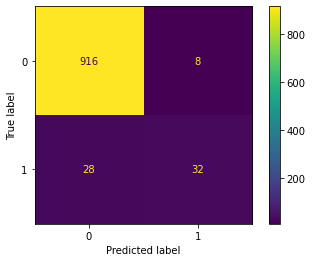

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg1, X_train_scaled, y_train)

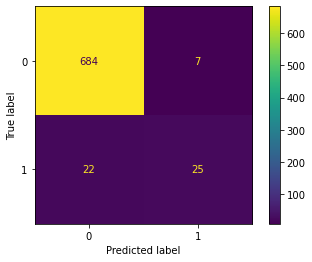

In [59]:
plot_confusion_matrix(logreg1, X_val_scaled, y_tr_val)

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2021)

In [61]:
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [62]:
logreg2 = LogisticRegression()

In [63]:
modeling_function(logreg1, X_train_res, y_train_res, X_val_scaled, y_tr_val)

Training accuracy:  0.8923160173160173
Validation accuracy:  0.8875338753387534


LogisticRegression()

In [64]:
rf = RandomForestClassifier(random_state=2021)

In [66]:
modeling_function(rf, X_train_scaled, y_train, X_val_scaled, y_tr_val)

Training accuracy:  1.0
Validation accuracy:  1.0


RandomForestClassifier(random_state=2021)

In [72]:
param_grid = {'n_estimators': [50, 75, 100],
              'max_depth': [1, 3, 5, 7, 10],
              'min_samples_leaf': [1, 3, 5, 7],
              'criterion': ['gini', 'entropy'],
              'max_leaf_nodes': [2,4,6,8,10,20,30],
              'n_jobs': [2,4,6,8,110,20,30],}

In [73]:
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')




In [ ]:
rf_gs.fit(X_train_scaled, y_train)